In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [3]:
final = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/ARIMA/NVAX/final.csv') 
final = final.set_index('Datetime')
final

,Close,Comp
Datetime,,
2021-01-21 09:30:00,125.140099,0.296000
2021-01-21 10:30:00,127.050003,0.000000
2021-01-21 11:00:00,129.000000,0.401900
2021-01-21 11:30:00,127.809998,0.214233
2021-01-21 12:00:00,126.500000,0.000000
...,...,...
2021-03-22 13:00:00,236.160004,0.042700
2021-03-22 13:30:00,237.500000,0.200080
2021-03-22 14:00:00,237.669998,0.530700


In [4]:
final_final = final

In [5]:
steps = -1
final['Actual_Close'] = final['Close'].shift(steps)
final = final.dropna()
final

,Close,Comp,Actual_Close
Datetime,,,
2021-01-21 09:30:00,125.140099,0.296000,127.050003
2021-01-21 10:30:00,127.050003,0.000000,129.000000
2021-01-21 11:00:00,129.000000,0.401900,127.809998
2021-01-21 11:30:00,127.809998,0.214233,126.500000
2021-01-21 12:00:00,126.500000,0.000000,127.699997
...,...,...,...
2021-03-22 12:30:00,237.369995,0.455320,236.160004
2021-03-22 13:00:00,236.160004,0.042700,237.500000
2021-03-22 13:30:00,237.500000,0.200080,237.669998


Text(0.5, 1.0, 'NVAX Opening Stock Value')

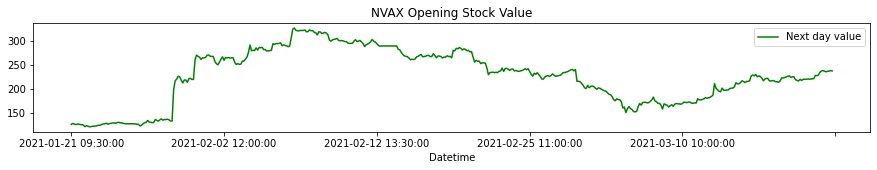

In [6]:
final['Actual_Close'].plot(color='green', figsize=(15,2))
plt.legend(['Next day value', 'Actual_Close'])
plt.title("NVAX Opening Stock Value")

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(final[['Comp','Close']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [8]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(final[['Actual_Close']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [9]:
X = pd.DataFrame(X)
X = X.rename(columns={0:'Comp',1:'Close'})
X.index = final.index 
X

,Comp,Close
Datetime,,
2021-01-21 09:30:00,0.624317,0.015833
2021-01-21 10:30:00,0.446507,0.025137
2021-01-21 11:00:00,0.687932,0.034637
2021-01-21 11:30:00,0.575199,0.028840
2021-01-21 12:00:00,0.446507,0.022458
...,...,...
2021-03-22 12:30:00,0.720022,0.562573
2021-03-22 13:00:00,0.472157,0.556678
2021-03-22 13:30:00,0.566697,0.563206


In [10]:
y = pd.DataFrame(y)
y = y.rename(columns={0:'Actual_Close'})
y.index = final.index 
y

,Actual_Close
Datetime,
2021-01-21 09:30:00,0.025137
2021-01-21 10:30:00,0.034637
2021-01-21 11:00:00,0.028840
2021-01-21 11:30:00,0.022458
2021-01-21 12:00:00,0.028304
...,...
2021-03-22 12:30:00,0.556678
2021-03-22 13:00:00,0.563206
2021-03-22 13:30:00,0.564034


In [11]:
train_size = int(len(final_final)*0.8)
test_size = int(len(final_final)) - train_size

train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [12]:
X

,Comp,Close
Datetime,,
2021-01-21 09:30:00,0.624317,0.015833
2021-01-21 10:30:00,0.446507,0.025137
2021-01-21 11:00:00,0.687932,0.034637
2021-01-21 11:30:00,0.575199,0.028840
2021-01-21 12:00:00,0.446507,0.022458
...,...,...
2021-03-22 12:30:00,0.720022,0.562573
2021-03-22 13:00:00,0.472157,0.556678
2021-03-22 13:30:00,0.566697,0.563206


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


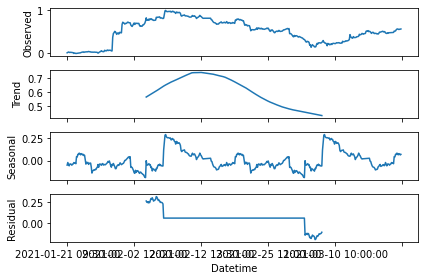

In [13]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Close'],model='add', freq=237);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [15]:
y_test=y['Actual_Close'][:train_size].dropna()
test_adf(y_test, "Stock Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Stock Price


In [16]:
test_adf(y_test.diff(), "Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Stock Price


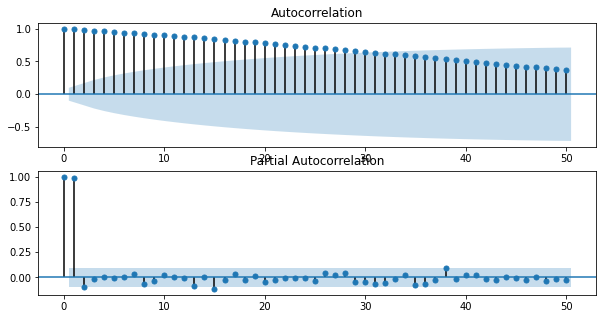

In [17]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [18]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 2.1MB 36.8MB/s 
     |████████████████████████████████| 9.5MB 20.0MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [19]:
from pmdarima.arima import auto_arima

step_wise = auto_arima(train_y, exogenous = train_X, start_p = 1, start_q = 1, max_p = 7, max_q =7, d = 1, max_d = 7, trace = True, error_action = 'ignore', suppress_warnings = True, stepwise = True )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1727.075, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1731.075, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1729.075, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1729.075, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1732.977, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.944 seconds


In [20]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 869.488
Date:                Thu, 25 Mar 2021   AIC                          -1732.977
Time:                        08:11:50   BIC                          -1721.010
Sample:                             0   HQIC                         -1728.237
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Comp           0.0003      0.010      0.032      0.974      -0.019       0.019
Close          0.1495      0.040      3.722      0.000       0.071       0.228
sigma2         0.0007   1.04e-05     72.429      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       42.03   Jarque-Bera (JB):             43828.79
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             4.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_y, exog=train_X, order=(0,1,0), enforce_invertibility = False, enforce_stationarity = False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


In [22]:
result = model.fit()

In [23]:
predictions= result.predict(start=train_size, end=train_size+test_size+(steps)-1,exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Issue warnings for unsupported indexes


In [24]:
predictions

400    0.228521
401    0.229712
402    0.231650
403    0.231245
404    0.230923
         ...   
494    0.278417
495    0.277455
496    0.278461
497    0.278650
498    0.279412
Length: 99, dtype: float64

In [28]:
predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'predicted_mean'})
predictions.index = test_y.index
predictions

,predicted_mean
Datetime,
2021-03-10 10:00:00,0.228521
2021-03-10 10:30:00,0.229712
2021-03-10 11:00:00,0.231650
2021-03-10 11:30:00,0.231245
2021-03-10 12:00:00,0.230923
...,...
2021-03-22 12:30:00,0.278417
2021-03-22 13:00:00,0.277455
2021-03-22 13:30:00,0.278461


In [29]:
unscaled_y_pred = test_y.merge(predictions, right_index=True, left_index=True )
unscaled_y_pred

,Actual_Close,predicted_mean
Datetime,,
2021-03-10 10:00:00,0.236516,0.228521
2021-03-10 10:30:00,0.250328,0.229712
2021-03-10 11:00:00,0.247088,0.231650
2021-03-10 11:30:00,0.245237,0.231245
2021-03-10 12:00:00,0.251423,0.230923
...,...,...
2021-03-22 12:30:00,0.556678,0.278417
2021-03-22 13:00:00,0.563206,0.277455
2021-03-22 13:30:00,0.564034,0.278461


In [79]:
with_forecast = unscaled_y_pred.append(SARIMAX_forecast)
with_forecast

,Actual_Close,predicted_mean,forecasted
2021-03-10 10:00:00,0.236516,0.228521,NaN
2021-03-10 10:30:00,0.250328,0.229712,NaN
2021-03-10 11:00:00,0.247088,0.231650,NaN
2021-03-10 11:30:00,0.245237,0.231245,NaN
2021-03-10 12:00:00,0.251423,0.230923,NaN
...,...,...,...
2021-03-26 13:30:00,NaN,NaN,0.278417
2021-03-26 14:00:00,NaN,NaN,0.277455
2021-03-26 14:30:00,NaN,NaN,0.278461
2021-03-26 15:00:00,NaN,NaN,0.278650


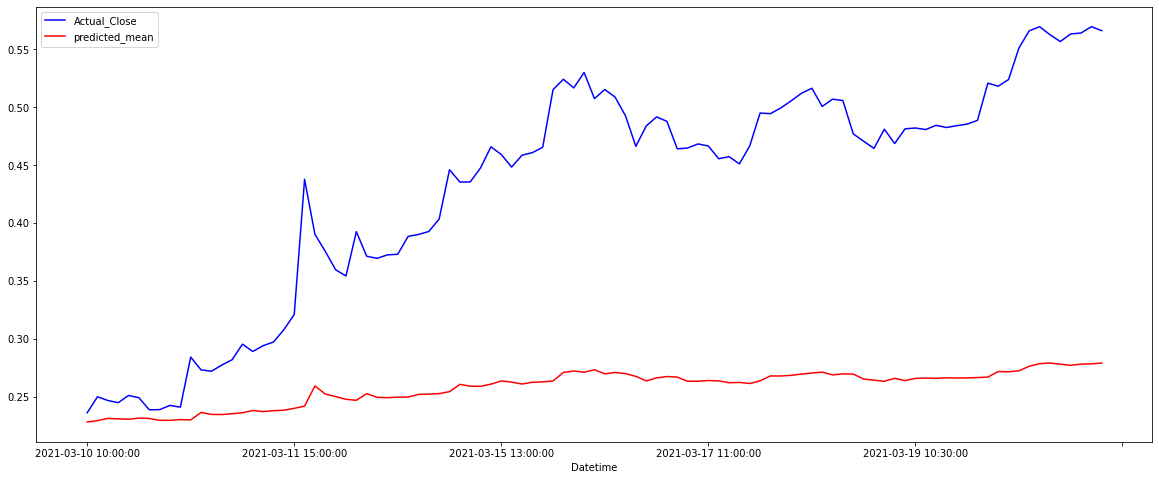

In [76]:
unscaled_y_pred['Actual_Close'].plot(figsize=(20,8), legend=True, color='blue')
unscaled_y_pred['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

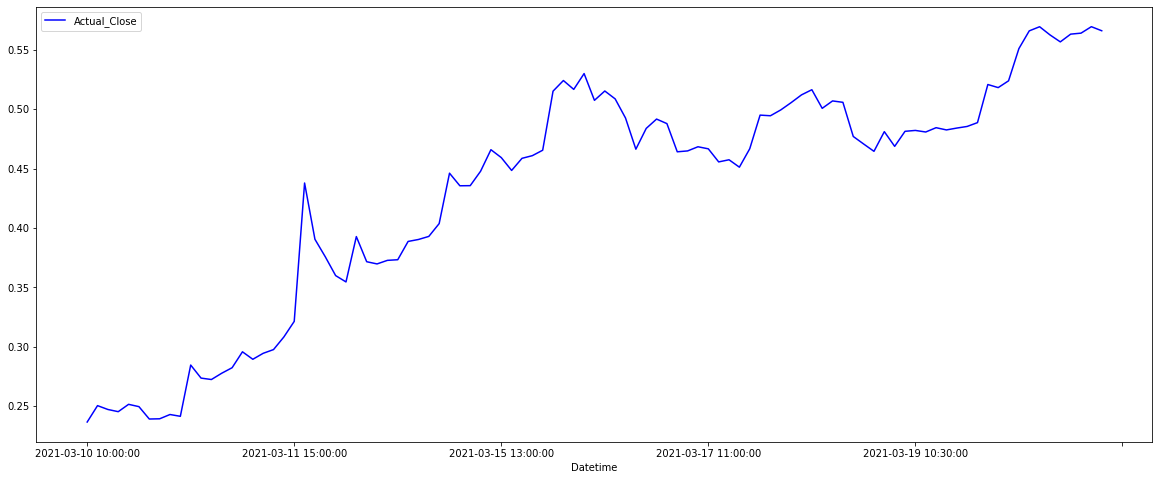

In [31]:
unscaled_y_pred['Actual_Close'].plot(figsize=(20,8), legend=True, color='blue')

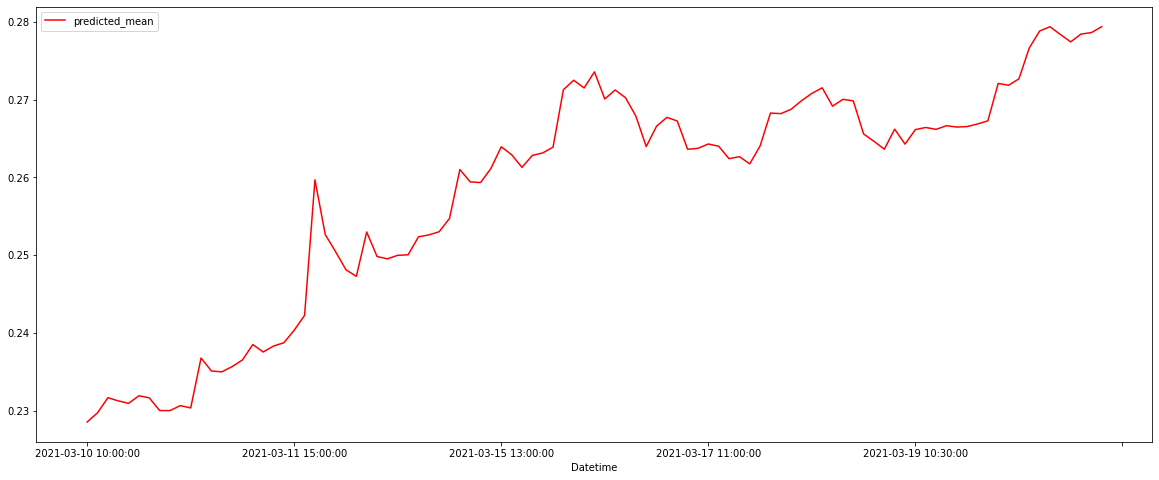

In [32]:
unscaled_y_pred['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

Evaluating model with RMSE

In [34]:
from statsmodels.tools.eval_measures import rmse

error = rmse(unscaled_y_pred['predicted_mean'],unscaled_y_pred['Actual_Close'])
error

0.19182665506745628

Scale back everything

In [35]:
trainPredict = sc_out.inverse_transform(unscaled_y_pred[['predicted_mean']])
testPredict = sc_out.inverse_transform(unscaled_y_pred[['Actual_Close']])

In [36]:
trainPredict =  pd.DataFrame(trainPredict, columns = ['Pred_Close'])
testPredict =  pd.DataFrame(testPredict, columns = ['Actual_Close'])

In [37]:
trainPredict = trainPredict.set_index(unscaled_y_pred.index)
testPredict = testPredict.set_index(unscaled_y_pred.index)
final_pred = trainPredict.merge(testPredict,right_index=True, left_index=True )
final_pred

,Pred_Close,Actual_Close
Datetime,,
2021-03-10 10:00:00,168.798784,170.440002
2021-03-10 10:30:00,169.043238,173.275101
2021-03-10 11:00:00,169.441159,172.610001
2021-03-10 11:30:00,169.357856,172.229996
2021-03-10 12:00:00,169.291919,173.500000
...,...,...
2021-03-22 12:30:00,179.040965,236.160004
2021-03-22 13:00:00,178.843460,237.500000
2021-03-22 13:30:00,179.050115,237.669998


In [38]:
from statsmodels.tools.eval_measures import rmse

error = rmse(final_pred['Pred_Close'],final_pred['Actual_Close'])
error

39.376486614581005

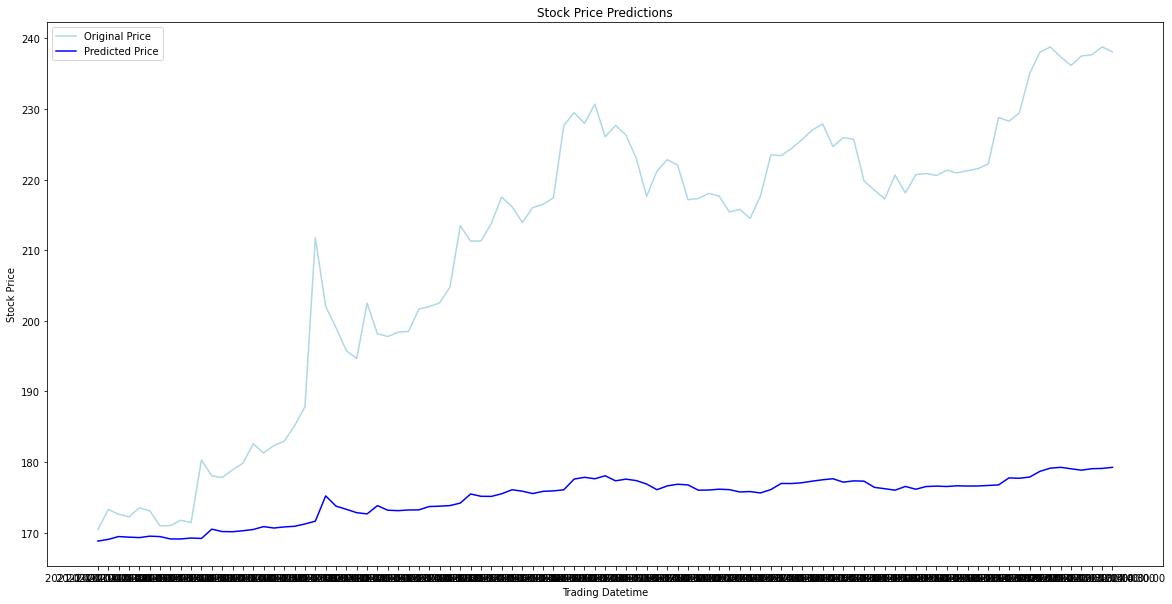

In [39]:
# plotting the full data
plt.plot(final_pred['Actual_Close'] , color = 'lightblue', label = 'Original Price')
plt.plot(final_pred['Pred_Close'] , color = 'blue', label = 'Predicted Price')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Datetime')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

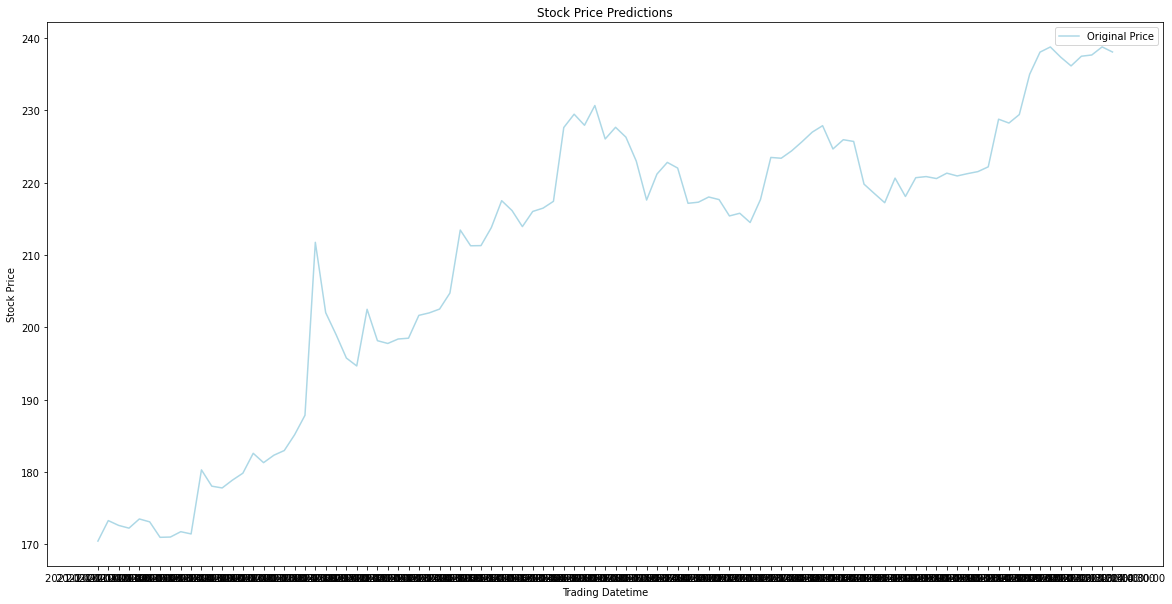

In [40]:
plt.plot(final_pred['Actual_Close'] , color = 'lightblue', label = 'Original Price')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Datetime')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

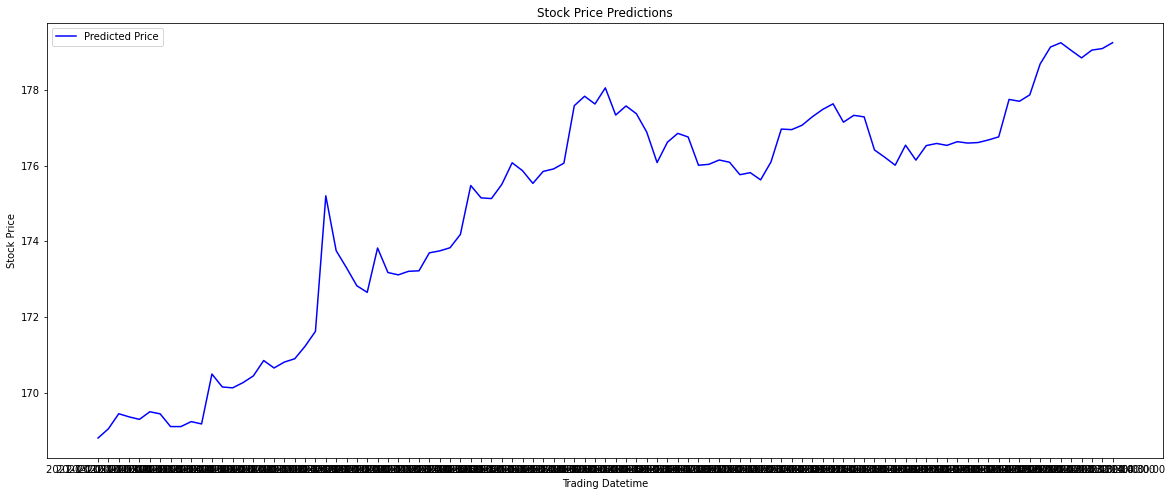

In [41]:
# plotting the full data
plt.plot(final_pred['Pred_Close'] , color = 'blue', label = 'Predicted Price')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Datetime')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()